In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.read_csv('Salary_Data.csv')

In [6]:
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [14]:
x=df1.iloc[:, :-1].values

In [15]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [16]:
y=df1.iloc[:,-1].values

In [17]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


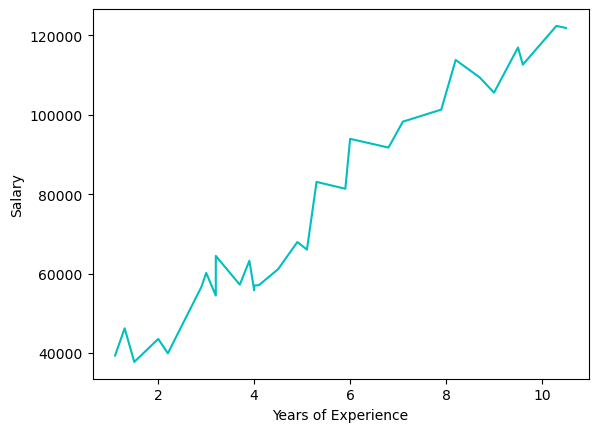

In [19]:
plt.plot(x,y,'c')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=10)

In [41]:
print("X Shape",x.shape)
print("Y Shape",y.shape)
print("X_Train Shape",x_train.shape)
print("X_Test Shape",x_test.shape)
print("Y_Train Shape",y_train.shape)
print("Y_Test Shape",y_test.shape)

X Shape (30, 1)
Y Shape (30,)
X_Train Shape (20, 1)
X_Test Shape (10, 1)
Y_Train Shape (20,)
Y_Test Shape (10,)


In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
print(regressor)

25630.510121837833
[9514.52350354]
LinearRegression()


In [43]:
y_pred=regressor.predict(x_test)
y_pred

array([ 90329.26994588,  56076.98533315,  53222.62828209,  39902.29537714,
        44659.55712891,  93183.62699694,  64640.05648633, 116969.93575577,
        63688.60413598,  37999.39067643])

In [44]:
df1_x_test=pd.DataFrame(x_test,columns=['Experience'])
df1_y_test=pd.DataFrame(y_test,columns=['Salary'])
df1_y_pred=pd.DataFrame(y_pred,columns=['Prediction'])
df1_diff=df1_y_test-df1_y_pred
y_test_pred=pd.concat([df1_x_test,df1_y_test,df1_y_pred],axis=1)
y_test_pred['Difference']=y_test_pred['Salary']-y_test_pred['Prediction']
y_test_pred

,Experience,Salary,Prediction,Difference
0,6.8,91738,90329.269946,1408.730054
1,3.2,54445,56076.985333,-1631.985333
2,2.9,56642,53222.628282,3419.371718
3,1.5,37731,39902.295377,-2171.295377
4,2.0,43525,44659.557129,-1134.557129
5,7.1,98273,93183.626997,5089.373003
6,4.1,57081,64640.056486,-7559.056486
7,9.6,112635,116969.935756,-4334.935756
8,4.0,56957,63688.604136,-6731.604136
9,1.3,46205,37999.390676,8205.609324


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9602319713033924

In [46]:
y_pred_f=regressor.predict(x)
y_pred_f

array([ 36096.48597573,  37999.39067643,  39902.29537714,  44659.55712891,
        46562.46182961,  53222.62828209,  54174.08063244,  56076.98533315,
        56076.98533315,  60834.24708492,  62737.15178562,  63688.60413598,
        63688.60413598,  64640.05648633,  68445.86588775,  72251.67528916,
        74154.57998987,  76057.48469057,  81766.19879269,  82717.65114305,
        90329.26994588,  93183.62699694, 100795.24579976, 103649.60285082,
       108406.86460259, 111261.22165365, 116018.48340542, 116969.93575577,
       123630.10220825, 125533.00690896])

In [47]:
y_pred_final=pd.DataFrame(y_pred_f,columns=['Prediction'])
y_pred_final

,Prediction
0,36096.485976
1,37999.390676
2,39902.295377
3,44659.557129
4,46562.461830
5,53222.628282
6,54174.080632
7,56076.985333
8,56076.985333
9,60834.247085


In [48]:
acc=r2_score(y,y_pred_f)
acc

0.9568667319430351

In [49]:
regressor.predict([[5]])

array([73203.12763951])